In [1]:
import pandas as pd
import numpy as np
import os
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_path(path):
    os.chdir(path)
    return os.getcwd()

In [3]:
path = pathlib.Path('C:\Temp\Dataset')
get_path(path)

'C:\\Temp\\Dataset'

## Load Data

In [5]:
data = pd.read_excel('Macroeconomic Vars.xlsx', index_col=0)
data.head(2)

,RGDPG,NGDPG,RDIG,NDIG,UE,CPI,T3M,T5Y,T10Y,BBB,MR,PR,DJI,HPI,CREI,MVI
Date,,,,,,,,,,,,,,,,
Q1 2005,4.5,7.9,-4.6,-2.4,5.3,2.0,2.5,3.9,4.4,5.2,5.8,5.4,11637.3,171.9,179.5,14.7
Q2 2005,1.9,4.7,3.9,6.4,5.1,2.7,2.9,3.9,4.2,5.4,5.7,5.9,11856.7,178.7,185.0,17.7


## 1. Correlation coefficient in base form

In [9]:
data.corr().head(7)

,RGDPG,NGDPG,RDIG,NDIG,UE,CPI,T3M,T5Y,T10Y,BBB,MR,PR,DJI,HPI,CREI,MVI
RGDPG,1.000000,0.928396,0.101299,0.246400,-0.132512,0.322807,0.088069,0.043394,-0.090656,-0.580748,-0.189787,0.036074,0.297201,0.241710,0.009489,-0.645442
NGDPG,0.928396,1.000000,0.068024,0.287803,-0.228643,0.483714,0.269444,0.210542,0.066393,-0.531550,-0.023767,0.213386,0.257009,0.330329,0.029367,-0.686055
RDIG,0.101299,0.068024,1.000000,0.909110,-0.106798,-0.177558,0.013711,0.011048,-0.043445,-0.116989,-0.065511,0.002514,0.137595,0.128247,0.076007,-0.087223
NDIG,0.246400,0.287803,0.909110,1.000000,-0.143121,0.241272,0.154038,0.149663,0.091794,-0.174867,0.052289,0.138265,0.118848,0.179055,0.047860,-0.277894
UE,-0.132512,-0.228643,-0.106798,-0.143121,1.000000,-0.109670,-0.590236,-0.456315,-0.128245,0.158386,-0.184284,-0.577238,-0.628308,-0.940991,-0.860641,0.373111
CPI,0.322807,0.483714,-0.177558,0.241272,-0.109670,1.000000,0.310991,0.303972,0.283506,-0.150057,0.254561,0.302114,-0.013664,0.133732,-0.024377,-0.431793
T3M,0.088069,0.269444,0.013711,0.154038,-0.590236,0.310991,1.000000,0.928511,0.773660,0.340207,0.785407,0.990169,-0.074624,0.622592,0.274087,-0.268751


## 2. Seaborn to create heatmap and Rotate X-axis

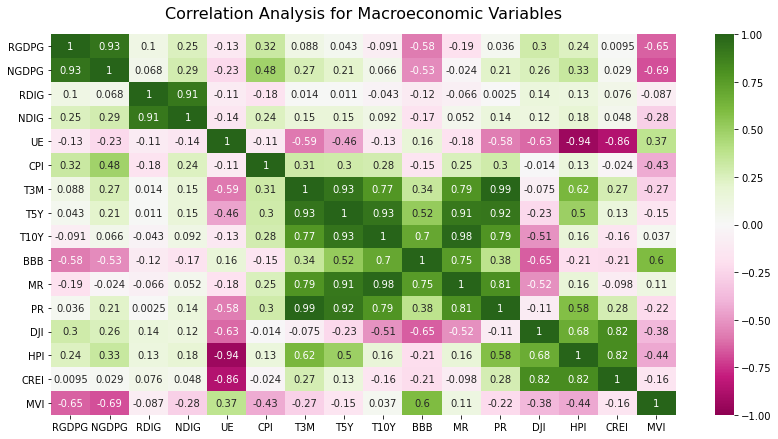

In [12]:
plt.figure(figsize=(14, 7))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='PiYG')
heatmap.set_title('Correlation Analysis for Macroeconomic Variables', fontdict={'fontsize':16}, pad=16);

In [13]:
def get_base_corr(df):
    sns.set(rc={"figure.dpi":300}) 
    
    plt.figure(figsize=(20, 10))
    ax = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, fmt='.1g', cmap='PiYG', linewidth = 0.8,  annot_kws={"size":15})
    ax.tick_params(labeltop=True, labelbottom = False, rotation=0)
    plt.xticks(rotation='horizontal', fontsize= 14)
    plt.yticks(fontsize = 14)
    ax.set_title('Correlation Analysis on MacroBase Vars', fontdict={'fontsize':18}, pad=16);
    plt.show()

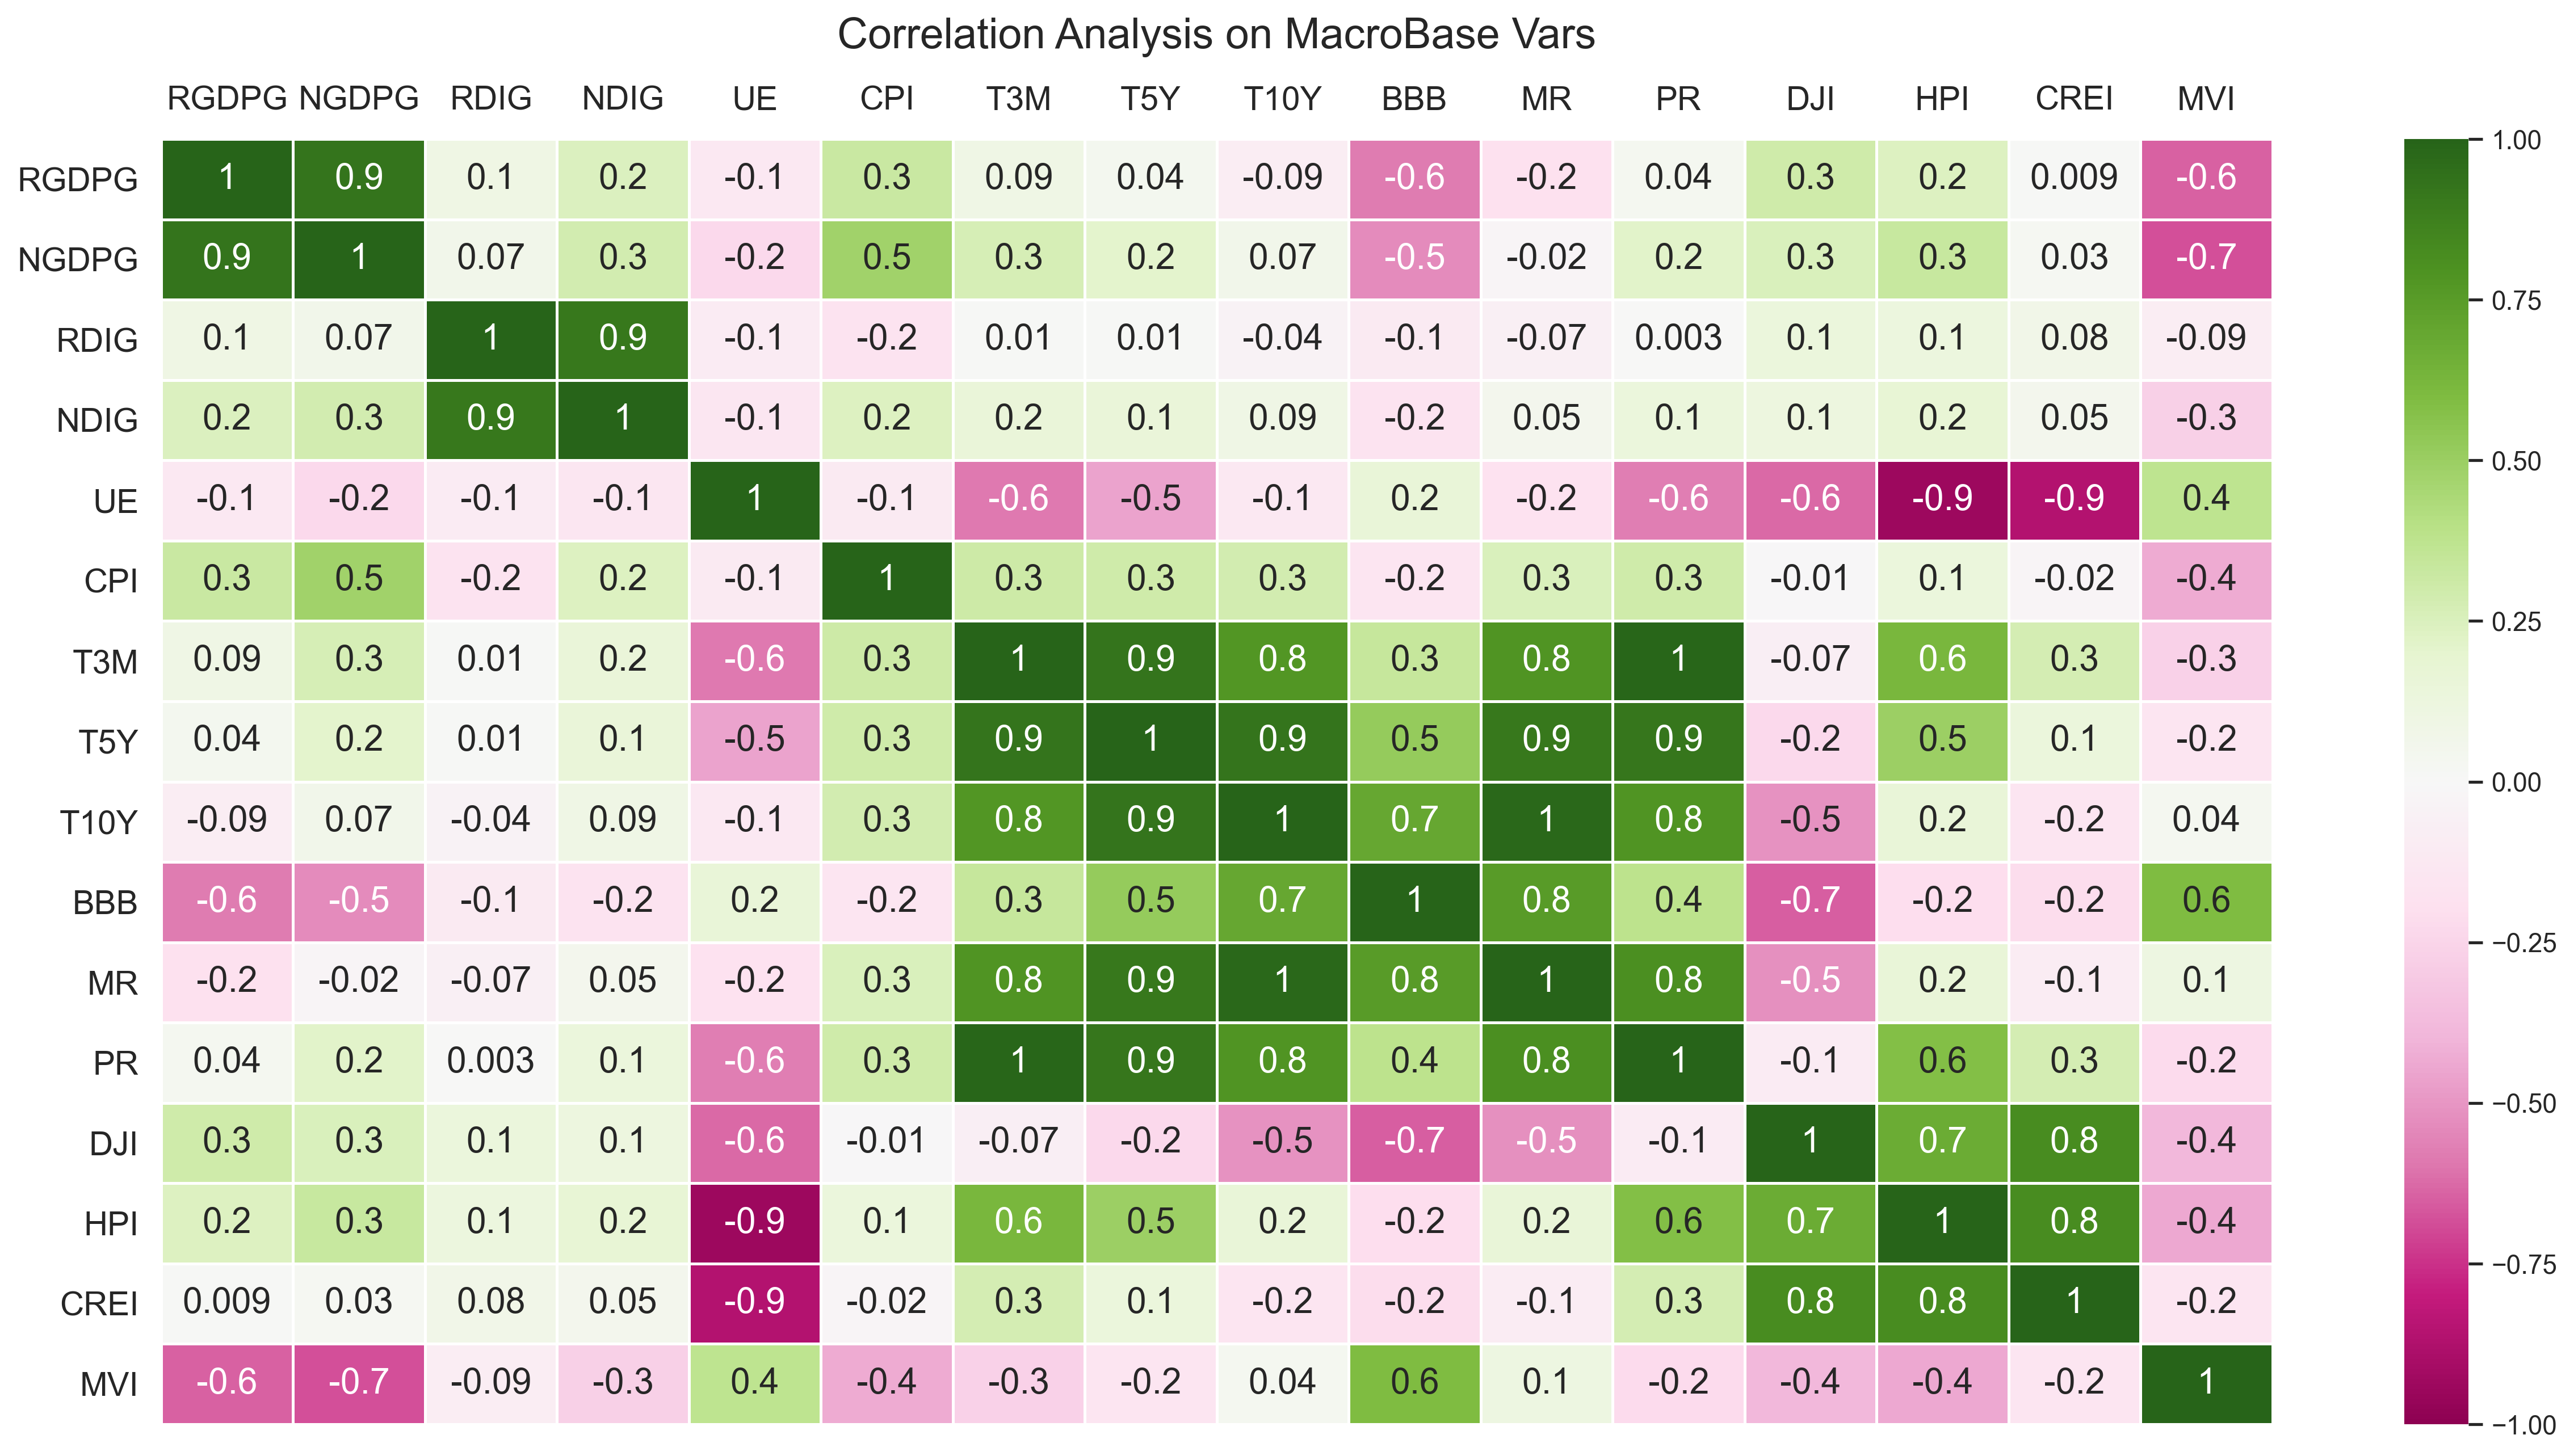

In [14]:
get_base_corr(data)

## 3. View Correlation coefficient in half

In [21]:
def plot_corr(df):
    sns.set(rc={"figure.dpi":300})
    #sns.set_context('notebook')
   # sns.set_style("ticks")
    plt.figure(figsize=(15, 10))
    ax = sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'PiYG', linewidth=0.7, fmt='.1g', annot_kws={"size":12}, mask = np.tril(df.corr()))
    ax.tick_params(labeltop=True, labelbottom = False, rotation=0)
    plt.xticks(rotation='horizontal', fontsize= 10)
    plt.yticks(fontsize = 10)
    plt.show()

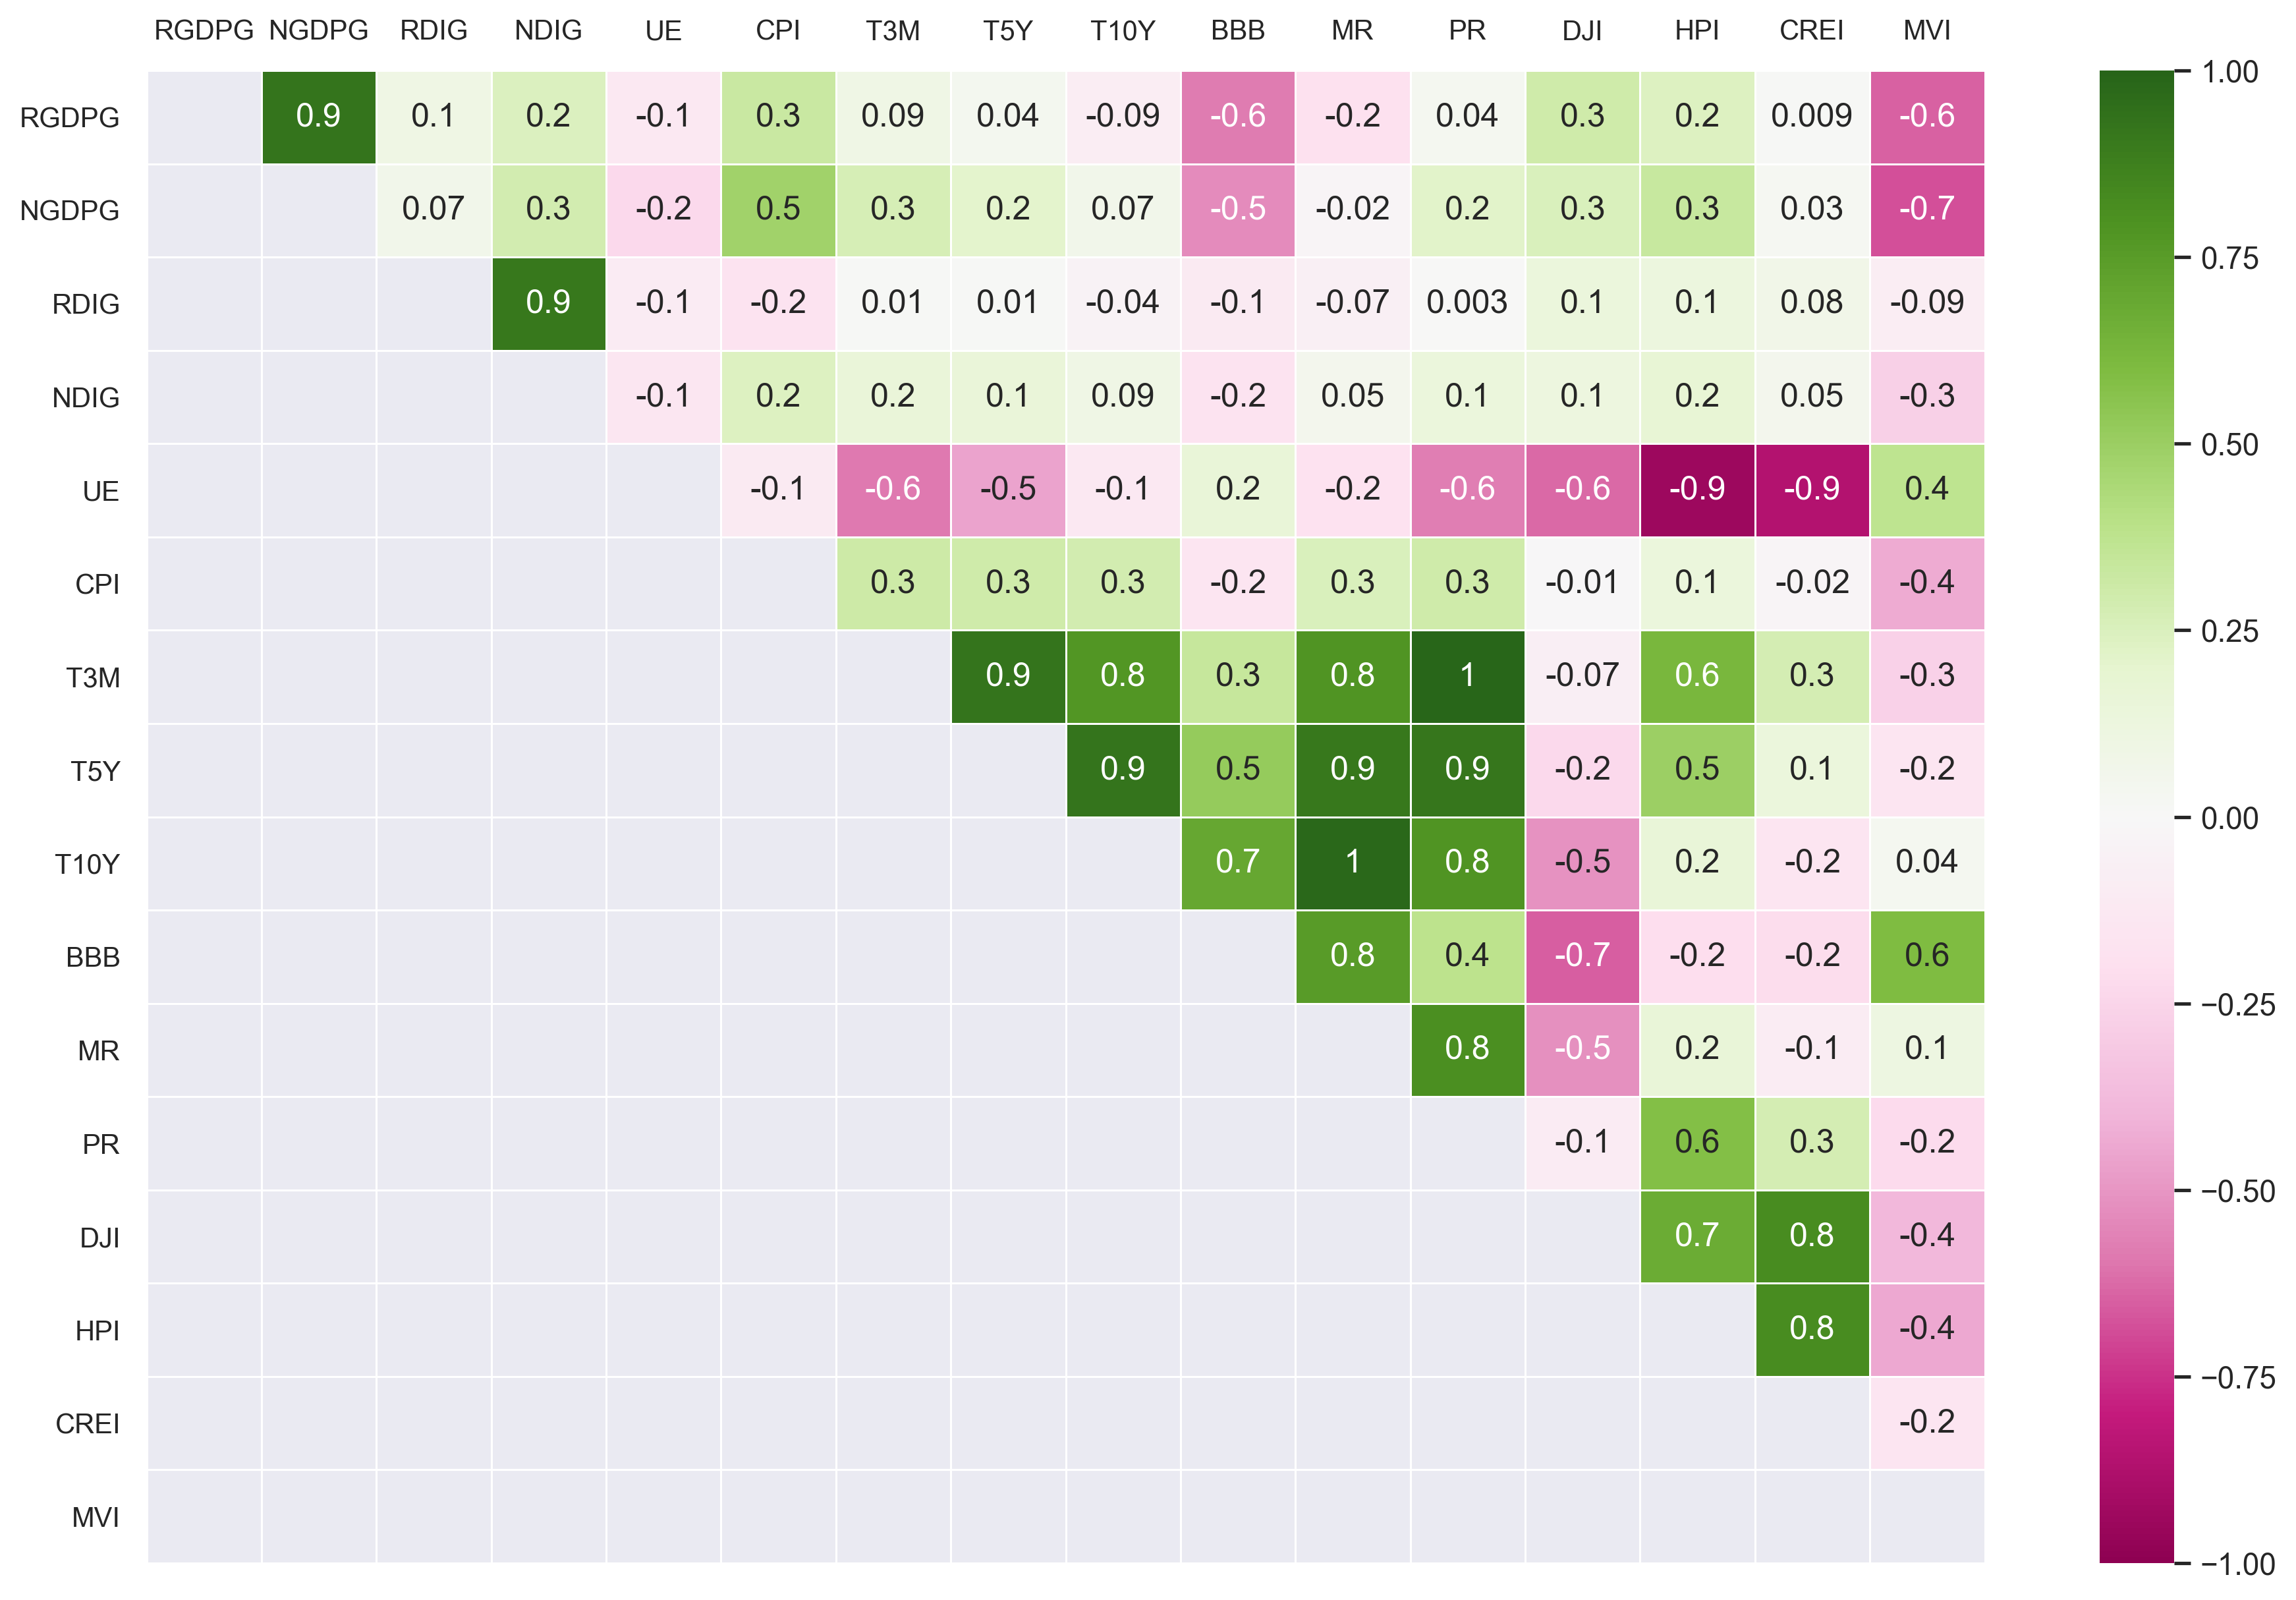

In [22]:
plot_corr(data)

## 4. Correlation coefficient in the single plot

In [23]:
df = pd.read_excel('Macroeconomic Vars_Update.xlsx', index_col=0)
df.head(2) 

,DR,RGDPG,NGDPG,RDIG,NDIG,UE,CPI,T3M,T5Y,T10Y,BBB,MR,PR,DJI,HPI,CREI,MVI
Date,,,,,,,,,,,,,,,,,
Q1 2005,0.01211,4.5,7.9,-4.6,-2.4,5.3,2.0,2.5,3.9,4.4,5.2,5.8,5.4,11637.3,171.9,179.5,14.7
Q2 2005,0.01234,1.9,4.7,3.9,6.4,5.1,2.7,2.9,3.9,4.2,5.4,5.7,5.9,11856.7,178.7,185.0,17.7


In [26]:
def plot_single_corr(df):
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.corr()[[list(df)[0]]].sort_values(by=list(df)[0], ascending=False), vmin = -1, vmax = 1, annot = True, cmap = 'PiYG')
    plt.show()

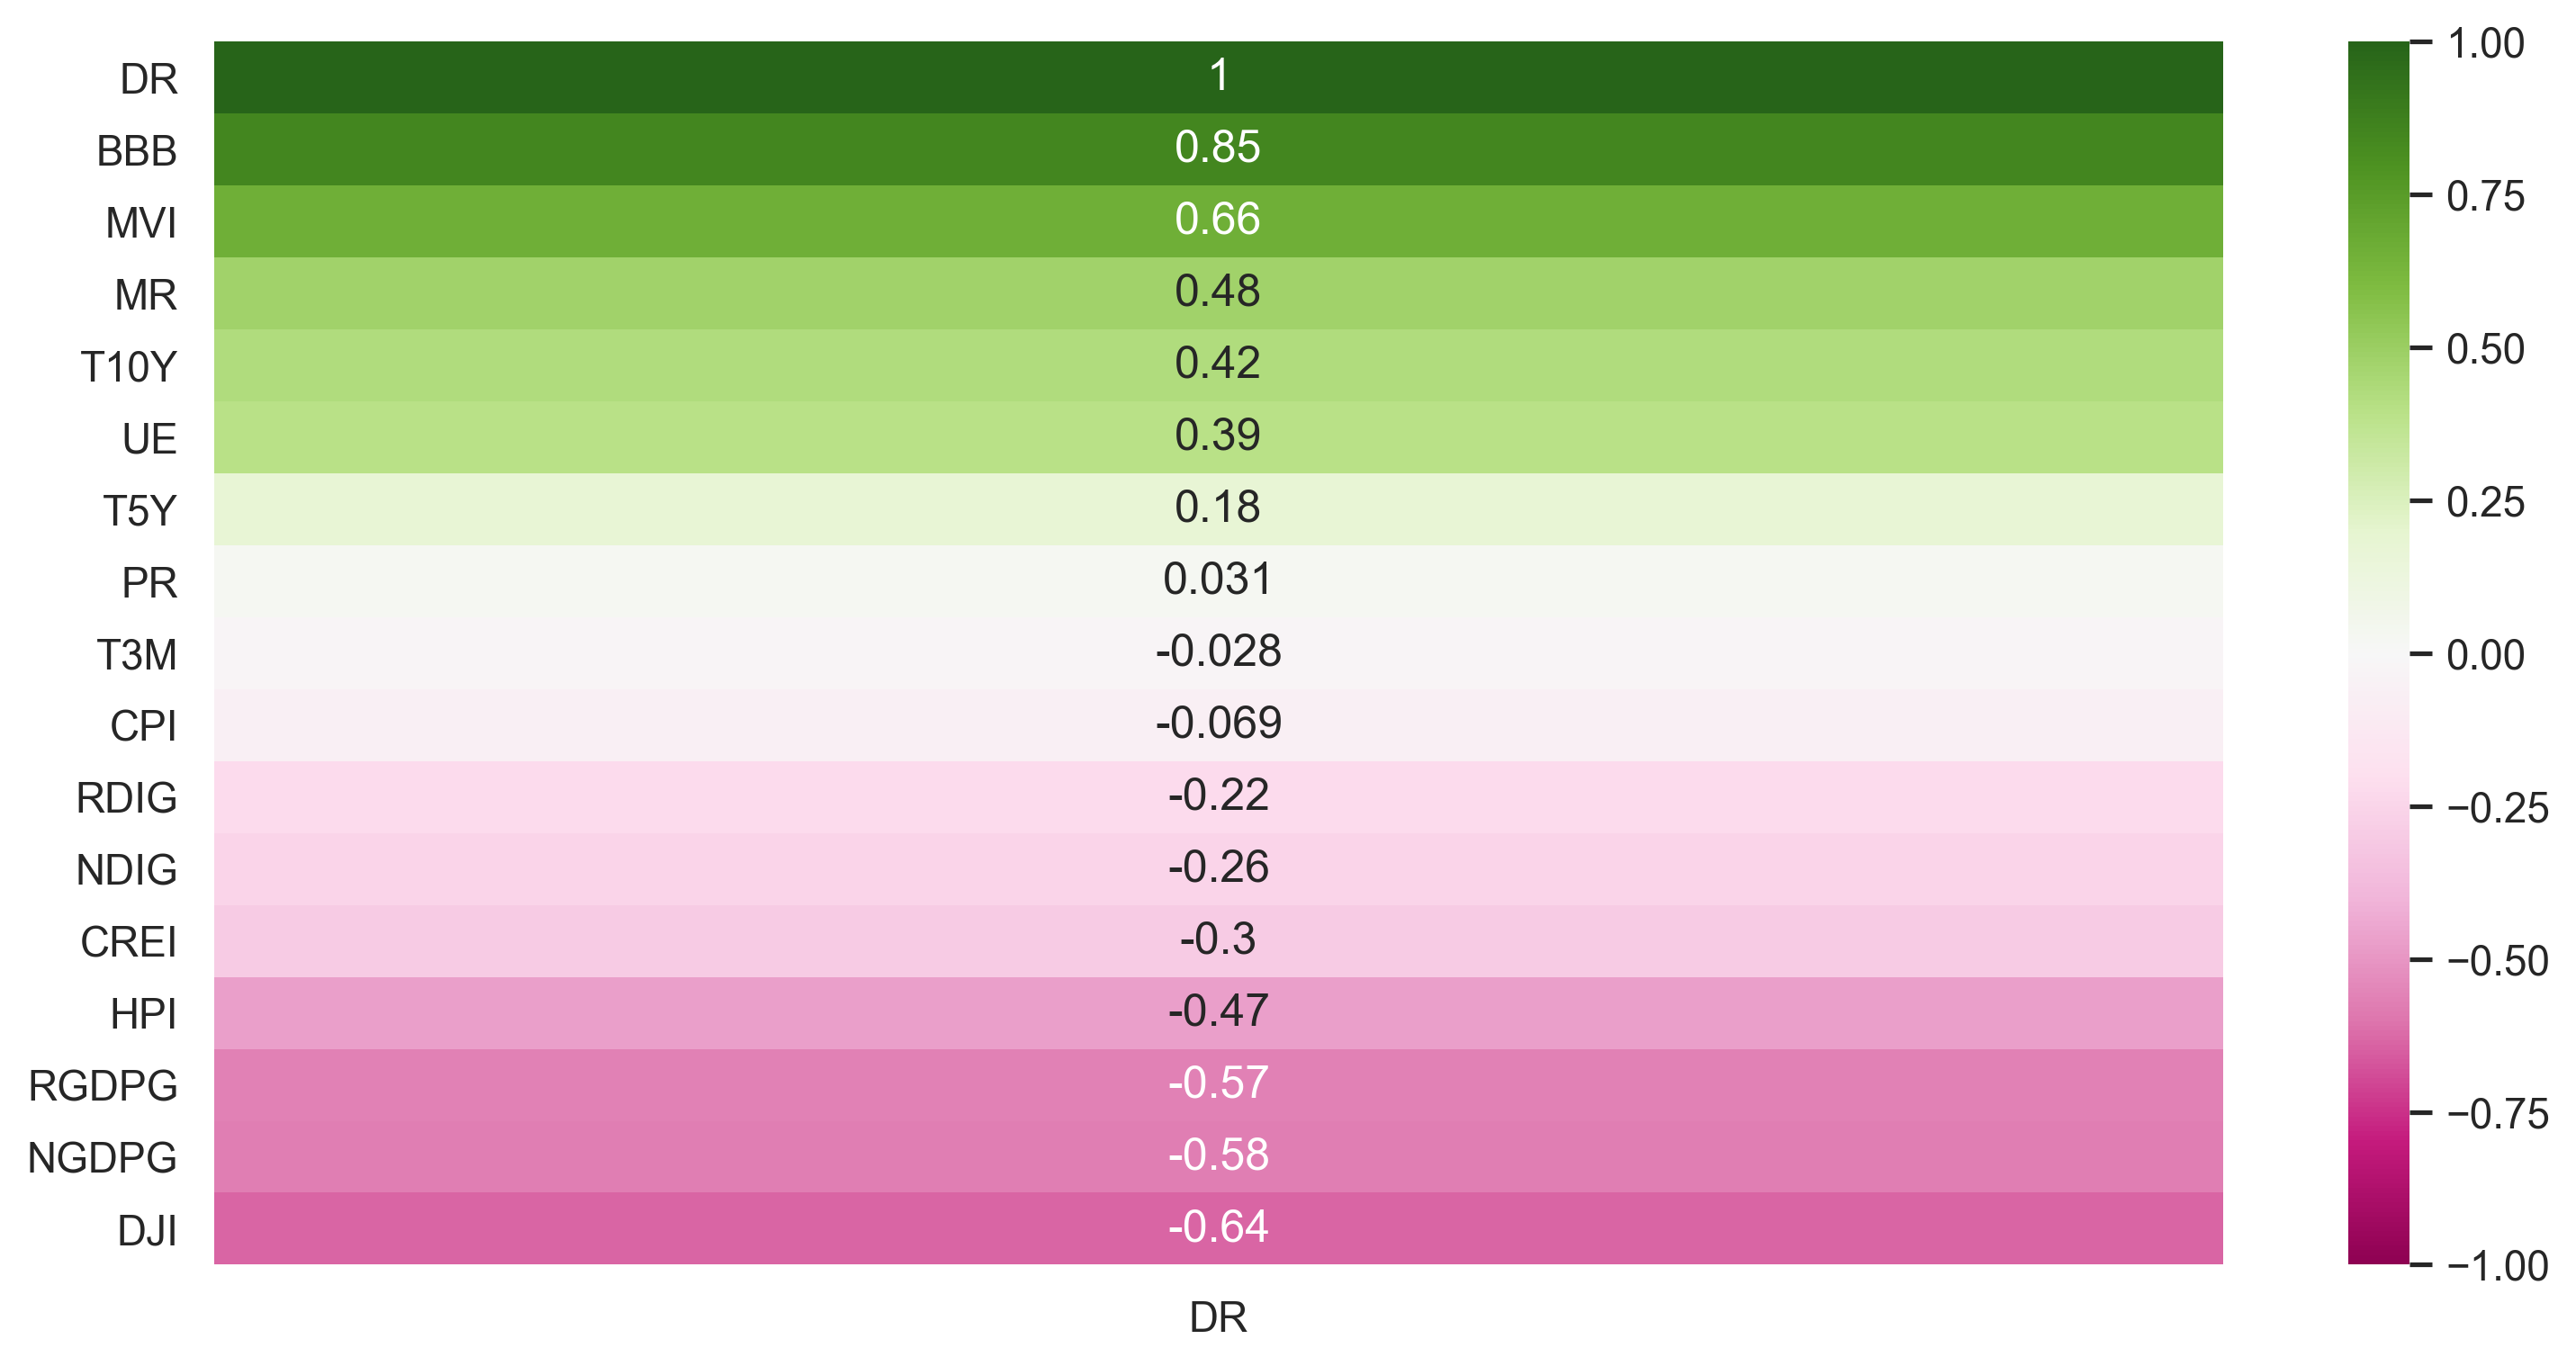

In [27]:
plot_single_corr(df)